# Tnks: Only the controls were used for the overall analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gene = 'Tnks'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30503270,C57BL/6N,f,control,wt (Tnks),22.8,87.40,55.06,2.39,1.13
1,30503301,C57BL/6N,f,control,wt (Tnks),23.8,92.13,62.73,2.63,1.01
2,30503302,C57BL/6N,f,control,wt (Tnks),22.5,80.57,47.86,3.11,1.70
3,30503326,C57BL/6N,m,control,wt (Tnks),27.2,88.50,56.85,2.86,1.21
4,30503770,C57BL/6N,m,control,wt (Tnks),26.0,87.12,55.28,3.12,1.37
5,30503771,C57BL/6N,m,control,wt (Tnks),26.5,87.24,55.36,2.81,1.27
6,30503774,C57BL/6N,m,control,wt (Tnks),30.1,84.88,52.09,2.54,1.19
7,30503775,C57BL/6N,m,control,wt (Tnks),29.7,82.01,49.33,3.06,1.55


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30503326,Tnks_2v2_15.dcm,2.755814,1.325000,1.046512,1.432500,800.000000,1.325000,0.974344,high,0.974344,high,28.415185,2.327826,91.807811,62.025316,C57BL/6N,m,control,wt (Tnks),27.2,88.50,56.85,2.86,1.21,-0.104186,2.807907,-0.163488,1.128256,3.307811,5.175316
1,30503326,Tnks_2v2_15.dcm,2.668605,1.400000,0.819767,1.514167,750.000000,1.400000,0.974344,high,0.974344,high,26.245952,1.197693,95.436656,69.281046,C57BL/6N,m,control,wt (Tnks),27.2,88.50,56.85,2.86,1.21,-0.191395,2.764302,-0.390233,1.014884,6.936656,12.431046
2,30503326,Tnks_2v2_15.dcm,2.406977,3.373333,1.011628,3.413333,847.058824,3.373333,0.929889,high,0.929889,high,20.306810,2.124217,89.539388,57.971014,C57BL/6N,m,control,wt (Tnks),27.2,88.50,56.85,2.86,1.21,-0.453023,2.633488,-0.198372,1.110814,1.039388,1.121014
3,30503326,Tnks_2v2_15.dcm,2.546512,3.444167,0.889535,3.489167,666.666667,3.444167,0.929889,high,0.929889,high,23.368778,1.497795,93.590613,65.068493,C57BL/6N,m,control,wt (Tnks),27.2,88.50,56.85,2.86,1.21,-0.313488,2.703256,-0.320465,1.049767,5.090613,8.218493
4,30503326,Tnks_2v2_15.dcm,2.319767,3.534167,1.063953,3.570000,742.268041,3.534167,0.929889,high,0.929889,high,18.514449,2.433851,86.854318,54.135338,C57BL/6N,m,control,wt (Tnks),27.2,88.50,56.85,2.86,1.21,-0.540233,2.589884,-0.146047,1.136977,-1.645682,-2.714662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,30503775,Tnks_2v2_37.dcm,2.633721,4.340000,0.872093,4.382500,642.857143,4.340000,0.999998,high,0.999999,high,25.404940,1.418930,94.414749,66.887417,C57BL/6N,m,control,wt (Tnks),29.7,82.01,49.33,3.06,1.55,-0.426279,2.846860,-0.677907,1.211047,12.404749,17.557417
749,30503775,Tnks_2v2_37.dcm,2.982558,4.433333,0.889535,4.468333,720.000000,4.433333,0.999999,high,0.999999,high,34.504526,1.497795,95.659133,70.175439,C57BL/6N,m,control,wt (Tnks),29.7,82.01,49.33,3.06,1.55,-0.077442,3.021279,-0.660465,1.219767,13.649133,20.845439
750,30503775,Tnks_2v2_37.dcm,3.017442,4.516667,0.889535,4.556667,666.666667,4.516667,0.999999,high,0.999999,high,35.499359,1.497795,95.780782,70.520231,C57BL/6N,m,control,wt (Tnks),29.7,82.01,49.33,3.06,1.55,-0.042558,3.038721,-0.660465,1.219767,13.770782,21.190231
751,30503775,Tnks_2v2_37.dcm,2.651163,4.606667,0.924419,4.646667,672.897196,4.606667,0.999999,high,0.999997,high,25.823545,1.663368,93.558715,65.131579,C57BL/6N,m,control,wt (Tnks),29.7,82.01,49.33,3.06,1.55,-0.408837,2.855581,-0.625581,1.237209,11.548715,15.801579


In [5]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Differences between automatic and manual measurements

In [6]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

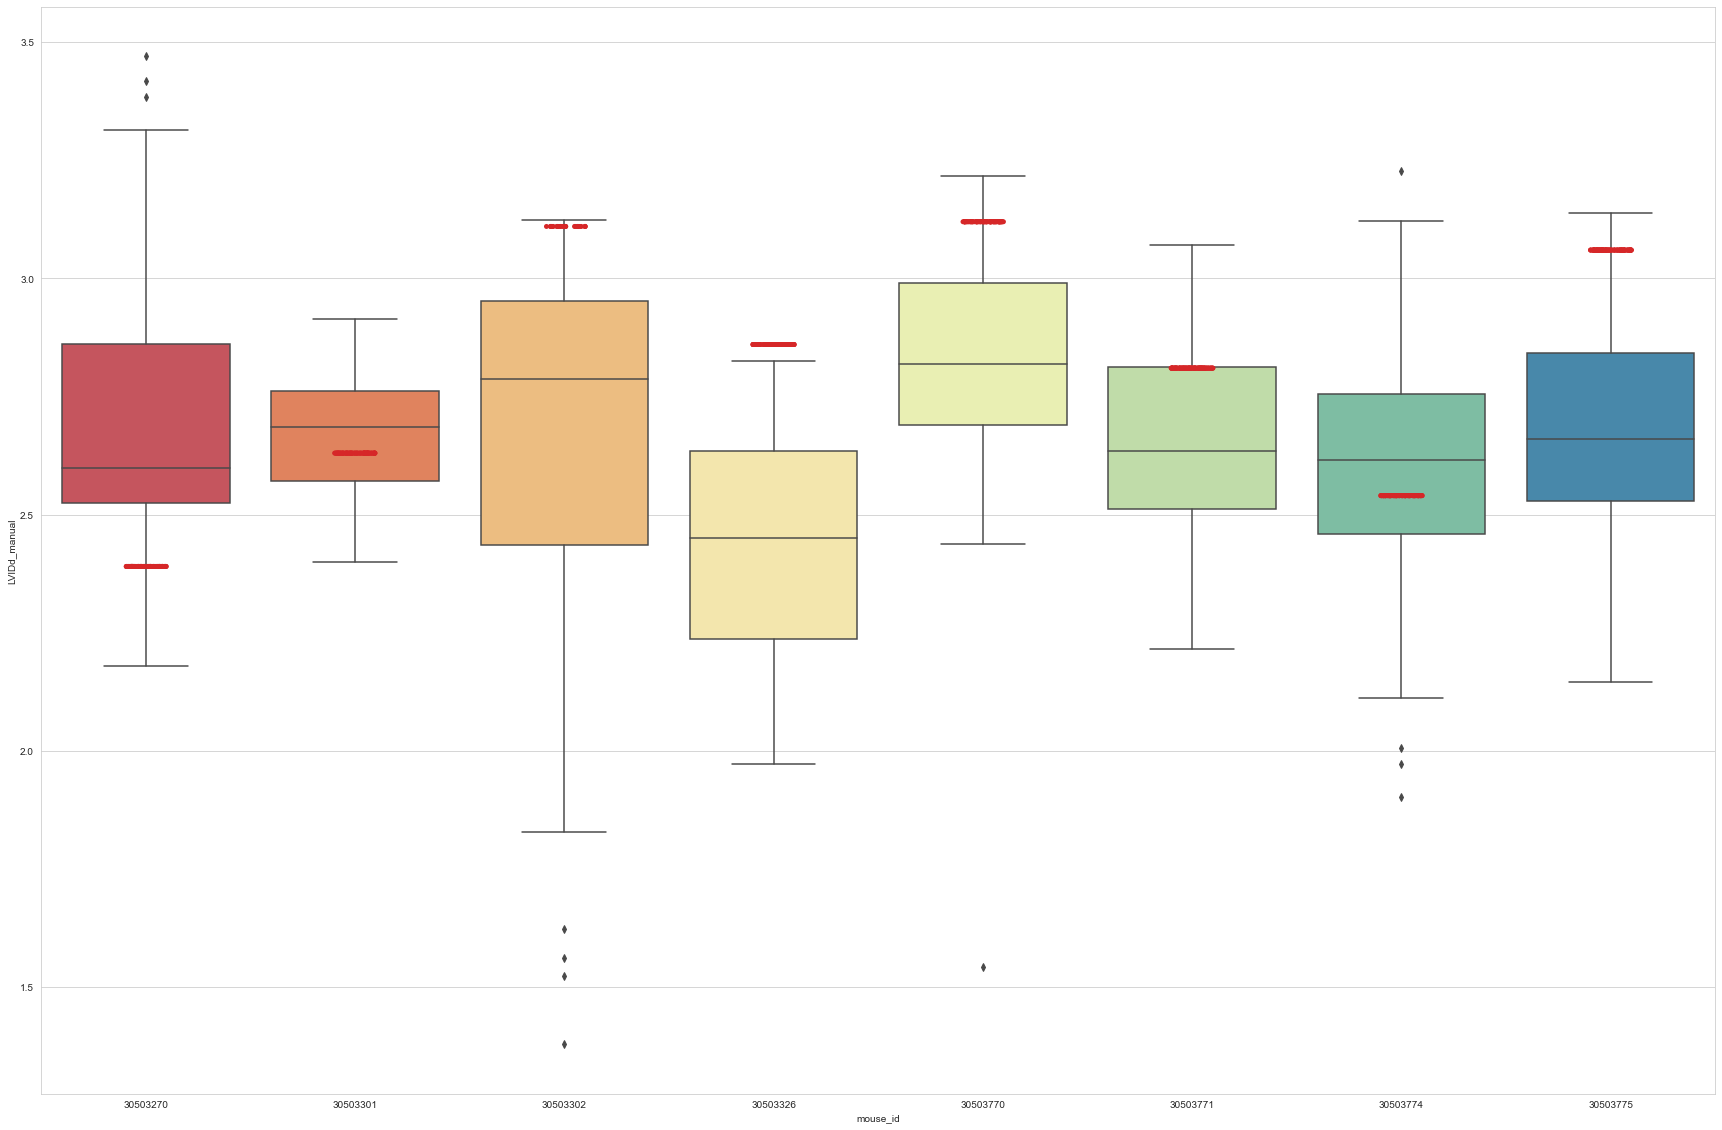

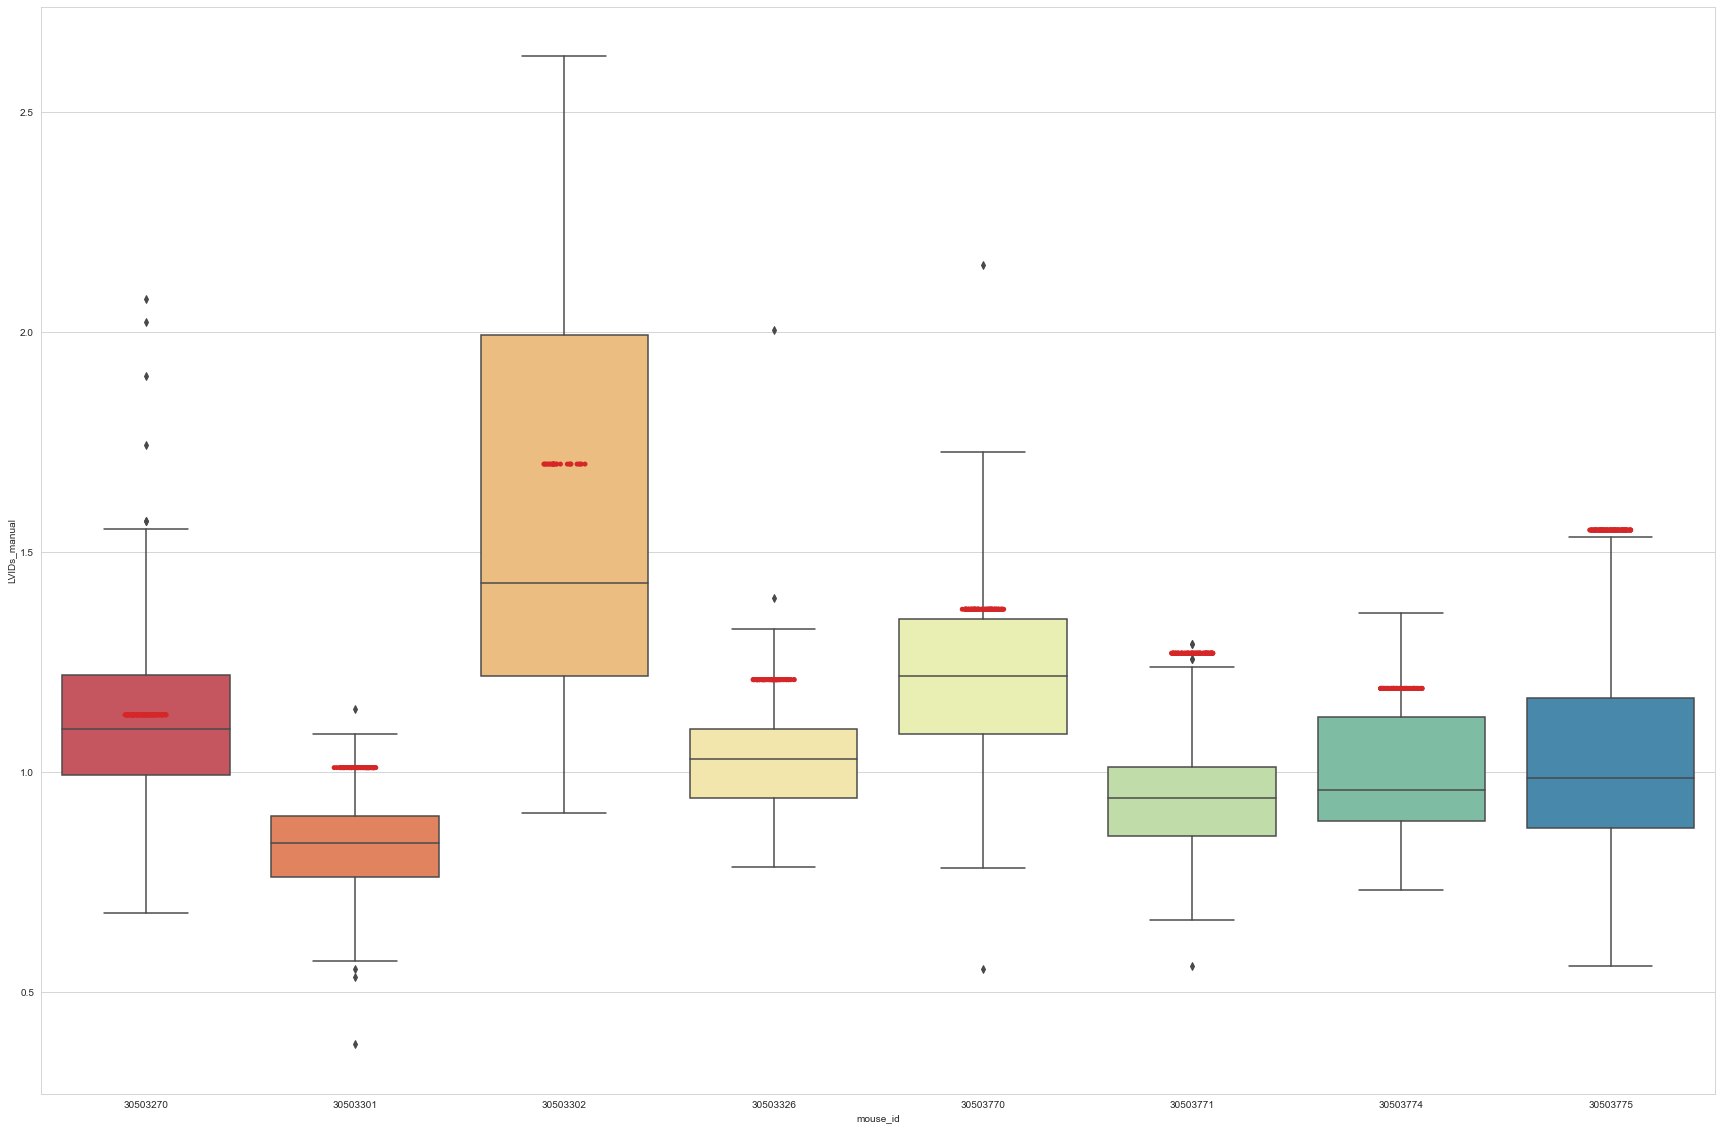

In [7]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

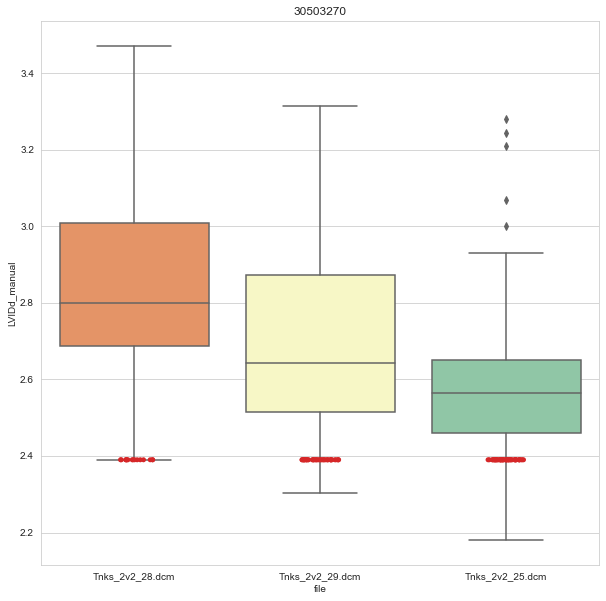

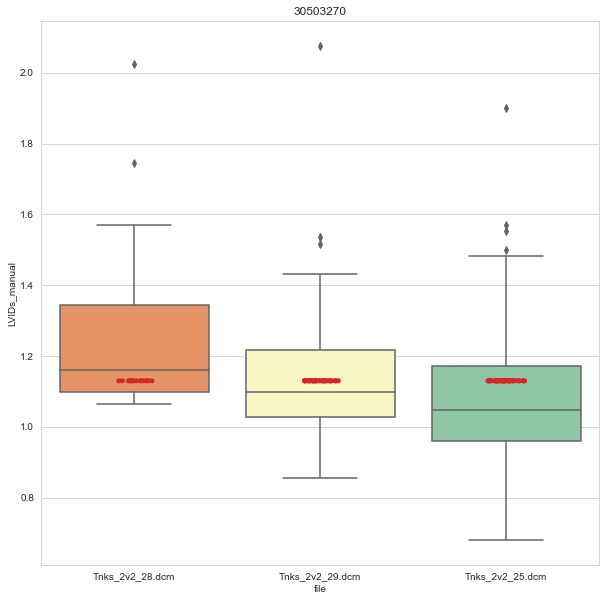

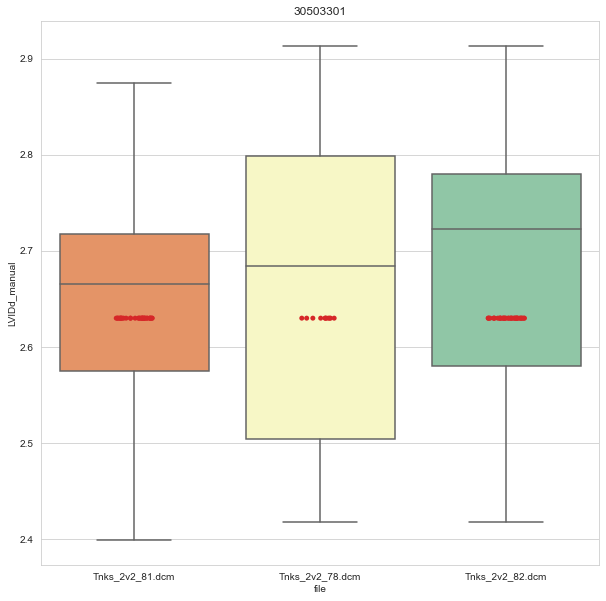

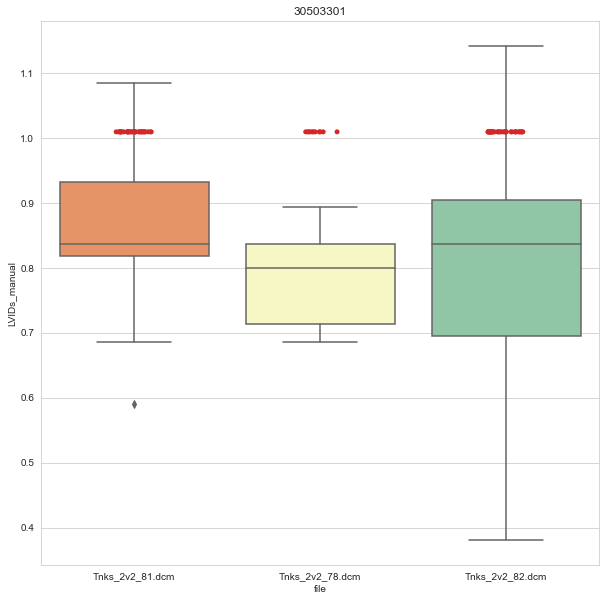

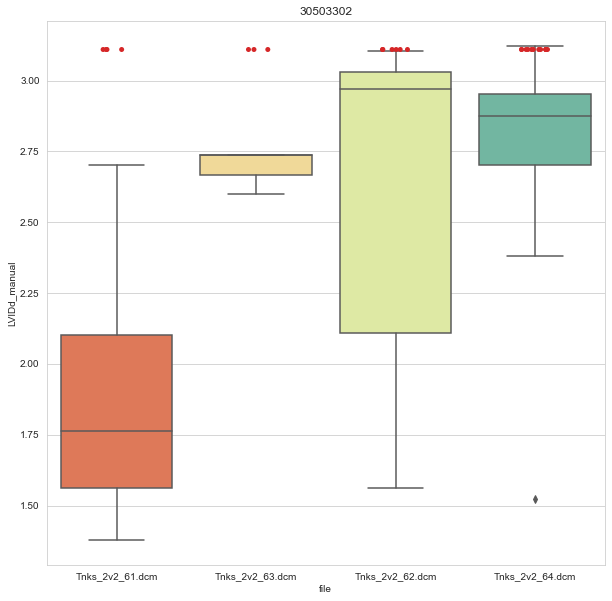

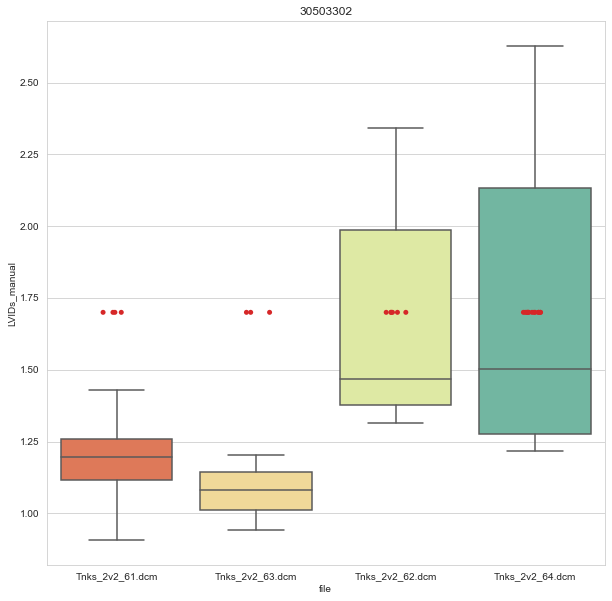

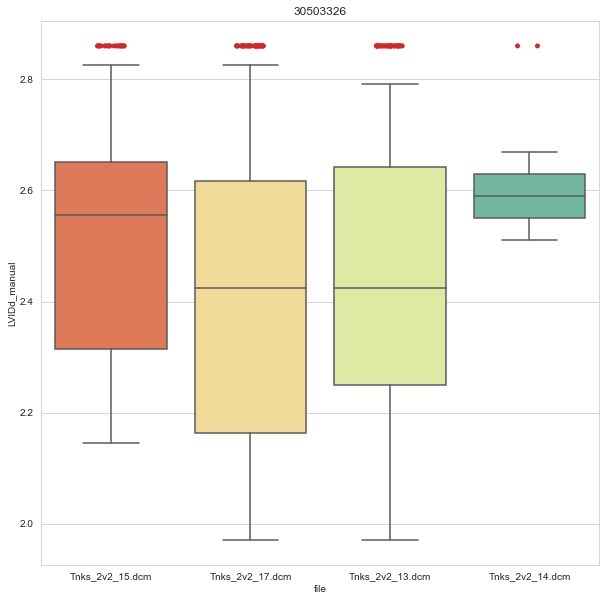

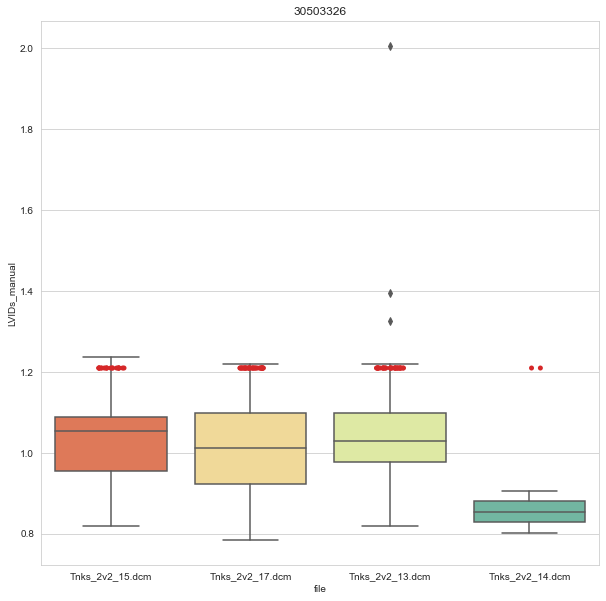

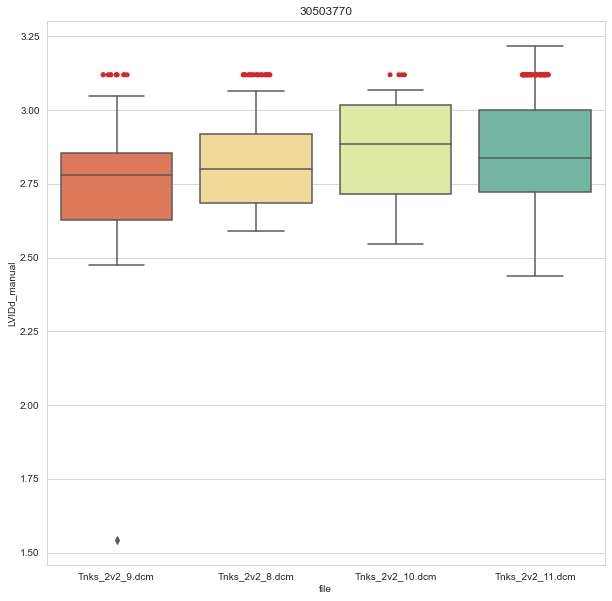

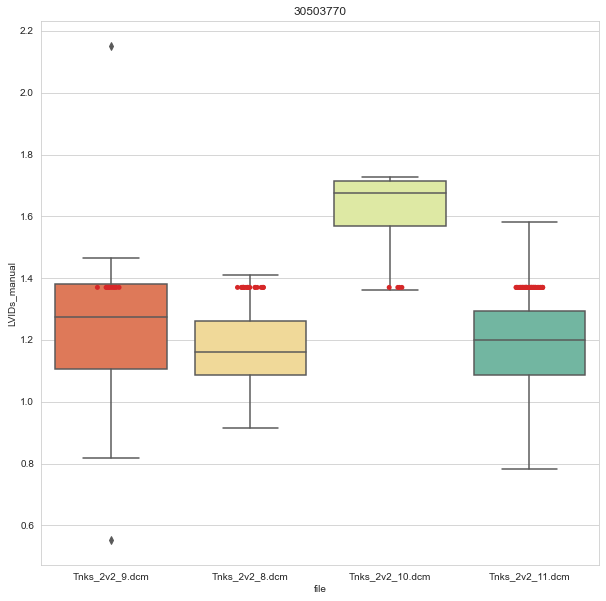

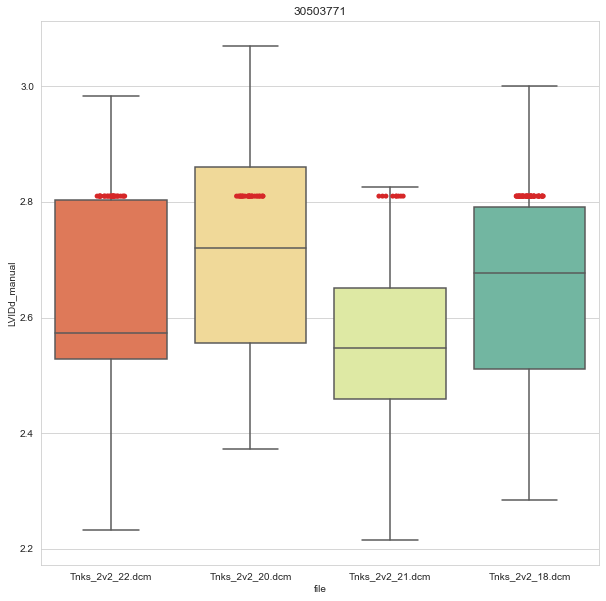

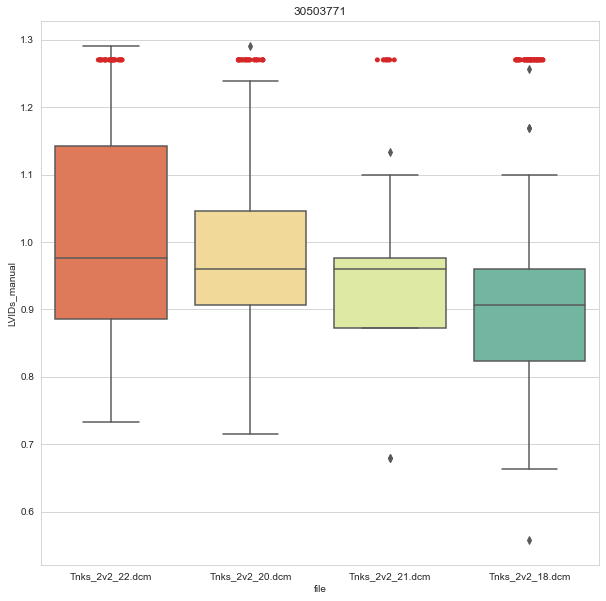

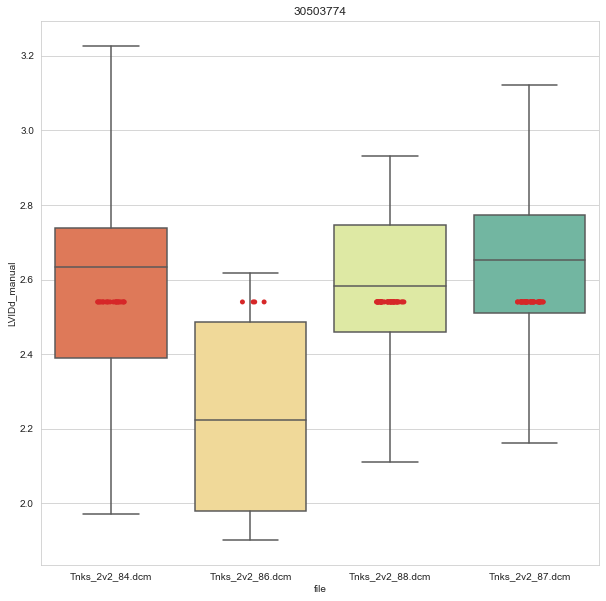

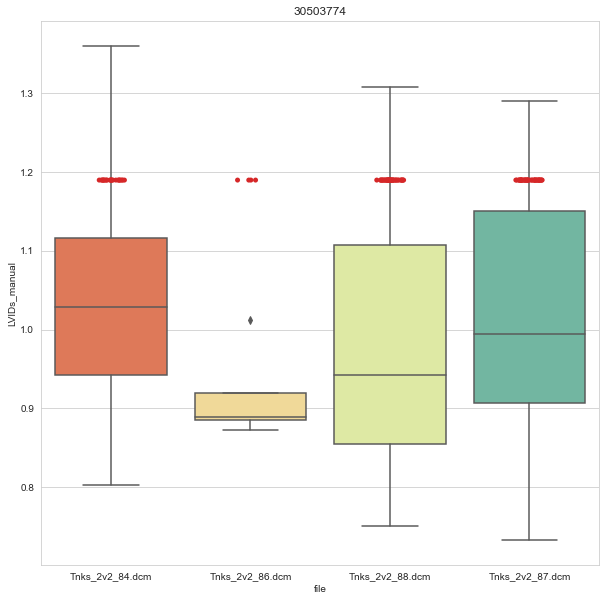

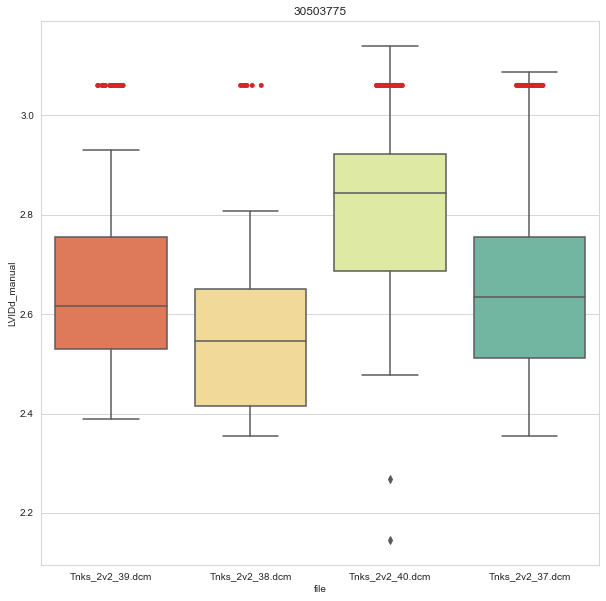

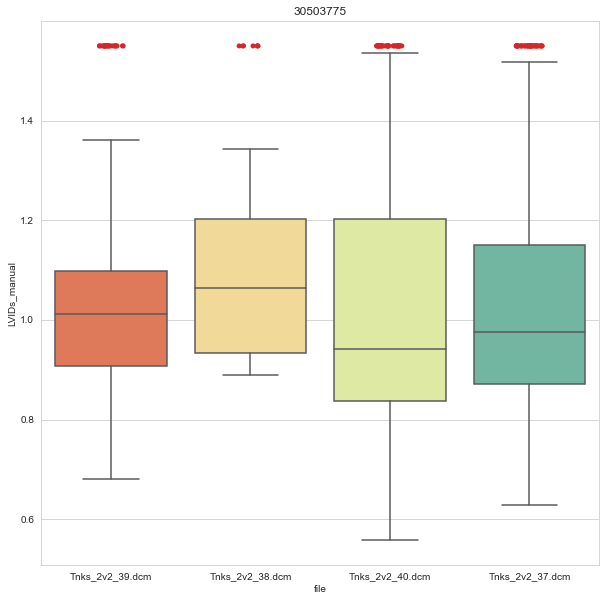

In [8]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [9]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
2056,30503270,Tnks_2v2_28,36.474216,63.525784
2057,30503270,Tnks_2v2_25,94.706185,5.293815
2058,30503270,Tnks_2v2_27,0.000000,100.000000
2059,30503270,Tnks_2v2_29,78.828366,21.171634
2060,30503301,Tnks_2v2_81,62.949640,37.050360
2061,30503301,Tnks_2v2_78,25.899281,74.100719
2062,30503301,Tnks_2v2_80,5.293815,94.706185
2063,30503301,Tnks_2v2_82,73.530923,26.469077
2064,30503302,Tnks_2v2_64,42.343268,57.656732
2065,30503302,Tnks_2v2_61,10.587631,89.412369


### Image quality per mouse

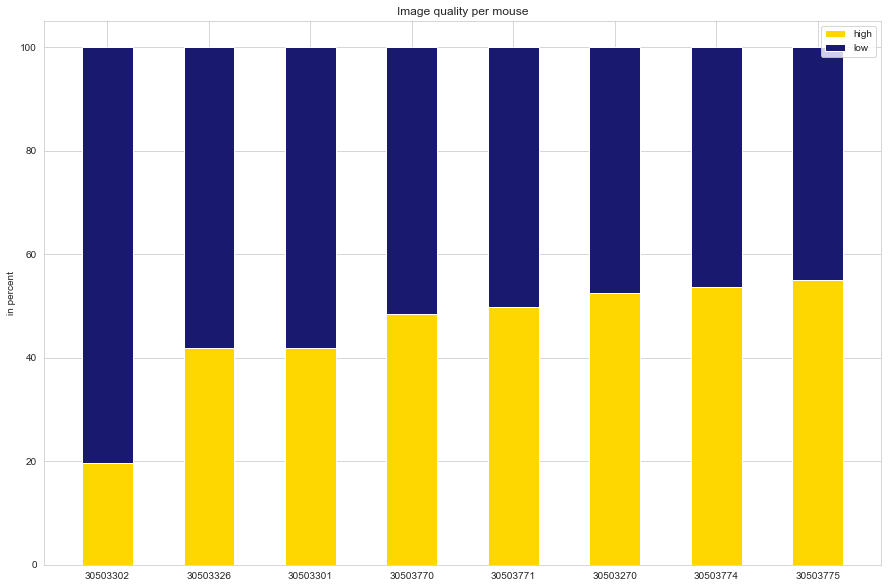

In [10]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [11]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Tnks,45.35,54.65


## Calculation of stats

In [12]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [13]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [14]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [15]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [16]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,753.00,753.00,753.00,753.00
mean,-0.13,-0.23,3.12,5.68
std,0.35,0.26,8.37,9.22
min,-1.73,-0.99,-68.33,-42.98
25%,-0.35,-0.36,1.26,1.55
50%,-0.12,-0.22,3.93,6.16
75%,0.09,-0.08,7.19,11.32
max,1.08,0.95,16.26,29.16
number of mice,8.00,8.00,8.00,8.00


In [17]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [18]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

In [19]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con']
)
num_stats

,man con,auto con
f,3,3
m,5,5


In [20]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')